In [1]:
!pip install nltk transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 719.5 kB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 264.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 24.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 1.7 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 kB 4.6 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 5.1 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 15.1 MB/s eta 0:00:00:00:01


In [2]:
import os, subprocess, torch, csv, nltk, json
from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F
import numpy as np
from collections import Counter
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from concurrent.futures import ThreadPoolExecutor

# Testing

In [3]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.fc1 = nn.Linear(16 * 6 * 6, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [4]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [5]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in range(10):  # let's pretend we have 10 batches
        # create some dummy input data and target labels
        inputs = torch.randn(1, 1, 32, 32)
        labels = torch.tensor([1])

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, torch.tensor([labels]))
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2 == 1:    # print every 2 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2))
            running_loss = 0.0

print('Finished Training')

[1,     2] loss: 2.303
[1,     4] loss: 2.116
[1,     6] loss: 1.858
[1,     8] loss: 1.357
[1,    10] loss: 0.442
[2,     2] loss: 0.011
[2,     4] loss: 0.000
[2,     6] loss: 0.000
[2,     8] loss: 0.000
[2,    10] loss: 0.000
Finished Training


# Bot Training

In [7]:
# Define the parent directory
parent_dir = "cloned_repos"

# Create the parent directory if it doesn't exist
os.makedirs(parent_dir, exist_ok=True)

# Read the repository URLs from the file
with open('training-repos.txt', 'r') as file:
    repos = file.readlines()

# Remove any trailing whitespace or newlines
repos = [repo.strip() for repo in repos]

# Clone each repository into the parent directory
for repo_url in repos:
    repo_name = repo_url.split('/')[-1].replace('.git', '')  # Extract the repository name
    target_dir = os.path.join(parent_dir, repo_name)  # Define the target directory
    subprocess.run(['git', 'clone', repo_url, target_dir])


Cloning into 'cloned_repos/powershell-algorithms'...
Cloning into 'cloned_repos/Empire'...
Cloning into 'cloned_repos/PowerSploit'...
Cloning into 'cloned_repos/Microsoft.PowerShell.Archive'...
Cloning into 'cloned_repos/ATP-PowerShell-Scripts'...
Cloning into 'cloned_repos/azure-docs-powershell-samples'...
Cloning into 'cloned_repos/azure-powershell-common'...
Cloning into 'cloned_repos/MSRC-Microsoft-Security-Updates-API'...
Cloning into 'cloned_repos/planetpowershell'...
Cloning into 'cloned_repos/TeamsStatus'...
Cloning into 'cloned_repos/hunt-detect-prevent'...
Cloning into 'cloned_repos/microsoftgraph-docs-powershell'...
Updating files: 100% (21483/21483), done.
Cloning into 'cloned_repos/365Inspect'...
Cloning into 'cloned_repos/MCAS'...
Cloning into 'cloned_repos/ExchangeAnalyzer'...
Cloning into 'cloned_repos/Microsoft.Xrm.Data.PowerShell.Samples'...
Cloning into 'cloned_repos/PSWriteWord'...
Cloning into 'cloned_repos/Generate-Macro'...
Cloning into 'cloned_repos/Community-Bl

In [8]:
# Ensure that the NLTK tokenizer is downloaded
nltk.download('punkt')

# Create a directory for the preprocessed data
os.makedirs('preprocessed_data', exist_ok=True)

# Function to preprocess and tokenize a PowerShell script
def preprocess_script(script_content):
    tokens = word_tokenize(script_content)
    return tokens

# Function to process a single file
def process_file(file_path, unique_sequences):
    try:
        with open(file_path, 'r', encoding='utf-8', errors='replace') as f:
            script_content = f.read()
        tokens = preprocess_script(script_content)
        sequence_str = ' '.join(tokens)
        if sequence_str not in unique_sequences:
            unique_sequences.add(sequence_str)
            # Save the preprocessed tokens to the 'preprocessed_data' directory
            with open(f'preprocessed_data/{os.path.basename(file_path)}.txt', 'w') as out_file:
                out_file.write(sequence_str)
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")

# Set to track unique sequences
unique_sequences = set()

# Use ThreadPoolExecutor to process files in parallel
with ThreadPoolExecutor(max_workers=4) as executor:  # Adjust max_workers as needed
    for root, dirs, files in os.walk('cloned_repos'):
        for file in files:
            if file.endswith('.ps1'):
                file_path = os.path.join(root, file)
                executor.submit(process_file, file_path, unique_sequences)

# Load feedback data from CSV and preprocess it
feedback_data = []
with open('data/feedback_data.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Preprocess user_correction column and tokenize
        corrected_tokens = preprocess_script(row['user_correction'])
        feedback_data.append(corrected_tokens)

# Save the feedback data into the preprocessed_data folder
for i, tokens in enumerate(feedback_data):
    with open(f'preprocessed_data/feedback_{i}.txt', 'w') as out_file:
        out_file.write(' '.join(tokens))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [9]:
!rm -rf cloned_repos

# Define Dataset Class

In [10]:
class BotDataset(Dataset):
    def __init__(self, data_dir, sequence_length=50):
        self.data_dir = data_dir
        self.sequence_length = sequence_length
        self.tokens = self.load_tokens()
        self.vocab = self.build_vocab()
        self.vocab['<UNK>'] = len(self.vocab)  # Ensure <UNK> token is added to the vocabulary
        self.token_indices = [self.vocab.get(token, self.vocab['<UNK>']) for token in self.tokens]
        self.num_samples = max(0, len(self.token_indices) - sequence_length)

    def load_tokens(self):
        tokens = []
        for file in os.listdir(self.data_dir):
            file_path = os.path.join(self.data_dir, file)
            with open(file_path, 'r') as f:
                file_tokens = f.read().split()
                print(f"Read {len(file_tokens)} tokens from {file_path}")  # Debugging print
                tokens.extend(file_tokens)
        print(f"Total tokens loaded: {len(tokens)}")  # Debugging print
        return tokens

    def build_vocab(self):
        counts = Counter(self.tokens)
        vocab = {token: idx for idx, (token, _) in enumerate(counts.items())}
        return vocab

    def __len__(self):
        return self.num_samples

    def __getitem__(self, idx):
        return (
            torch.tensor(self.token_indices[idx : idx + self.sequence_length]),
            torch.tensor(self.token_indices[idx + 1 : idx + self.sequence_length + 1]),
        )

# Define RNN Model

In [11]:
class RNNModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim=64, hidden_dim=128, num_layers=2):
        super(RNNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.rnn = nn.LSTM(embedding_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)

    def forward(self, x):
        x = self.embedding(x)
        output, (hidden, cell) = self.rnn(x)
        logits = self.fc(output)
        return logits

# Print a message to confirm that the class is defined
print("RNNModel class defined successfully.")


RNNModel class defined successfully.


# Prepare Dataset and Data Loader

In [12]:
dataset = BotDataset('preprocessed_data', sequence_length=50)
train_dataset, val_dataset = train_test_split(dataset, test_size=0.2, random_state=42)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=16, num_workers=4)

Read 92 tokens from preprocessed_data/DoGen.ps1.txt
Read 50 tokens from preprocessed_data/DoTests.ps1.txt
Read 171 tokens from preprocessed_data/DetectingCycles.ps1.txt
Read 293 tokens from preprocessed_data/bellmanFord.ps1.txt
Read 797 tokens from preprocessed_data/bellmanFord.tests.ps1.txt
Read 176 tokens from preprocessed_data/breadthFirstSearch.ps1.txt
Read 1322 tokens from preprocessed_data/breadthFirstSearch.tests.ps1.txt
Read 641 tokens from preprocessed_data/bfTravellingSalesman.ps1.txt
Read 382 tokens from preprocessed_data/bfTravellingSalesman.tests.ps1.txt
Read 158 tokens from preprocessed_data/euclieanAlgorithm.tests.ps1.txt
Read 182 tokens from preprocessed_data/euclideanAlgorithm.ps1.txt
Read 40 tokens from preprocessed_data/factorial.ps1.txt
Read 47 tokens from preprocessed_data/factorial.tests.ps1.txt
Read 76 tokens from preprocessed_data/fibonacci.ps1.txt
Read 60 tokens from preprocessed_data/fibonacciNth.ps1.txt
Read 73 tokens from preprocessed_data/fibonacciNth.tests

# Save Model Configuration to JSON

In [13]:
# Configuration of the model's architecture
config = {
    "vocab_size": len(dataset.vocab) + 1,  # Add 1 for the <UNK> token
    "embedding_dim": 64,
    "hidden_dim": 128,
    "num_layers": 2
}

# Save the configuration to a JSON file
with open('model/config.json', 'w') as f:
    json.dump(config, f)

# Assuming dataset.vocab is your token-to-index mapping
vocab = dataset.vocab  # Replace with your actual vocab object
vocab['<UNK>'] = len(vocab)  # Add <UNK> token to the vocab

vocab_inv = {index: token for token, index in vocab.items()}  # Create the index-to-token mapping

# Save the vocab mapping
with open('model/vocab.json', 'w') as f:
    json.dump(vocab, f)

# Save the vocab_inv mapping
with open('model/vocab_inv.json', 'w') as f:
    json.dump(vocab_inv, f)

# Train the Model

Epoch 1, Batch 0, Loss: 12.051661491394043
Epoch 1, Batch 100, Loss: 6.481511116027832
Epoch 1, Batch 200, Loss: 7.606586933135986
Epoch 1, Batch 300, Loss: 6.338944911956787
Epoch 1, Batch 400, Loss: 7.4007673263549805
Epoch 1, Batch 500, Loss: 6.402853012084961
Epoch 1, Batch 600, Loss: 7.624668121337891
Epoch 1, Batch 700, Loss: 7.647252082824707
Epoch 1, Batch 800, Loss: 6.447075366973877
Epoch 1, Batch 900, Loss: 6.529944896697998
Epoch 1, Batch 1000, Loss: 5.782379627227783
Epoch 1, Batch 1100, Loss: 6.3005876541137695
Epoch 1, Batch 1200, Loss: 6.637610912322998
Epoch 1, Batch 1300, Loss: 6.383246421813965
Epoch 1, Batch 1400, Loss: 6.204864978790283
Epoch 1, Batch 1500, Loss: 5.8931884765625
Epoch 1, Batch 1600, Loss: 6.19228458404541
Epoch 1, Batch 1700, Loss: 5.898012161254883
Epoch 1, Batch 1800, Loss: 5.2461466789245605
Epoch 1, Batch 1900, Loss: 5.997270584106445
Epoch 1, Batch 2000, Loss: 5.7610931396484375
Epoch 1, Batch 2100, Loss: 4.693686008453369
Epoch 1, Batch 2200,

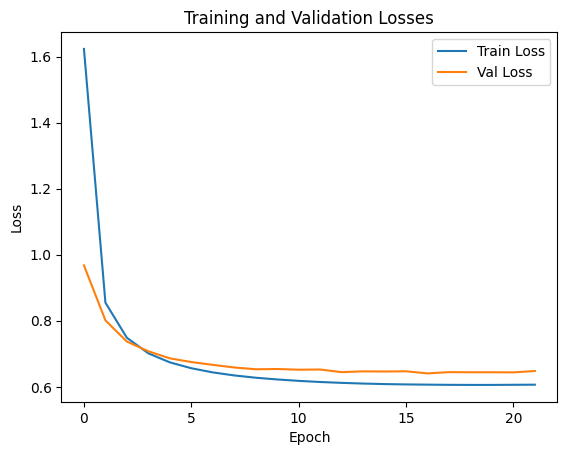

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = RNNModel(len(dataset.vocab) + 1).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

train_losses = []
val_losses = []

num_epochs = 200  # Increased number of epochs
early_stopping_patience = 5  # How many epochs to wait after last time validation loss improved
best_val_loss = np.inf  # Initialize with a very large number
epochs_no_improve = 0  # Counter for epochs with no improvement

for epoch in range(num_epochs):
    model.train()
    train_loss = 0
    for i, (inputs, targets) in enumerate(train_loader):
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.view(-1, len(dataset.vocab) + 1), targets.view(-1))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

        if i % 100 == 0:  # Print every 100 batches
            print(f'Epoch {epoch + 1}, Batch {i}, Loss: {loss.item()}')

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    model.eval()
    val_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs.view(-1, len(dataset.vocab) + 1), targets.view(-1))
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        # Save the best model
        torch.save(model.state_dict(), 'model/bot_rnn_model_best.pth')
    else:
        epochs_no_improve += 1
        if epochs_no_improve == early_stopping_patience:
            print(f'Early stopping triggered after epoch {epoch + 1}')
            break

# Load the best model
model.load_state_dict(torch.load('model/bot_rnn_model_best.pth'))

# Plot the training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Losses')
plt.legend()
plt.show()

In [15]:
# Save the model's state dictionary
torch.save(model.state_dict(), 'model/bot_rnn_model_state_dict.pth')

print('Model saved successfully.')

Model saved successfully.
